In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Rain Prediction/rainfall_dataset.csv")
df.head()

,date_time,rainfall,relative_humidity,temperature,wind_speed_SP,wind_speed_DR
0,2018-01-01 00:00:00,0.0,98,16.5,2,8
1,2018-01-01 03:00:00,0.0,74,19.2,3,9
2,2018-01-01 06:00:00,0.0,57,25.7,3,12
3,2018-01-01 09:00:00,0.0,58,26.2,4,13
4,2018-01-01 12:00:00,0.0,77,23.0,0,0


In [ ]:
df = df[['date_time', 'rainfall']]

In [ ]:
train = df.iloc[:13148, 1:2]
test = df.iloc[13148:, 1:2]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_scale = sc.fit_transform(train)
test_scale = sc.fit_transform(test)

In [ ]:
X_train = []
y_train = []

In [ ]:
ws = 24

In [ ]:
for i in range(ws, len(training_scale)):
  X_train.append(training_scale[i-ws:i, 0:1])
  y_train.append(training_scale[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Devloping LSTM MODEl

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
Model_P = Sequential()

Model_P.add(LSTM(units=60, return_sequences = True, input_shape=(X_train.shape[1], 1)))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units=60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units=60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units=60))
Model_P.add(Dropout(0.2))

Model_P.add(Dense(units=1))

Model_P.compile(optimizer='adam', loss='mean_squared_error')

Model_P.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
411/411 [==============================] - 37s 67ms/step - loss: 0.0026
Epoch 2/30
411/411 [==============================] - 28s 67ms/step - loss: 0.0025
Epoch 3/30
411/411 [==============================] - 27s 66ms/step - loss: 0.0025
Epoch 4/30
411/411 [==============================] - 27s 65ms/step - loss: 0.0025
Epoch 5/30
411/411 [==============================] - 27s 66ms/step - loss: 0.0024
Epoch 6/30
411/411 [==============================] - 28s 68ms/step - loss: 0.0024
Epoch 7/30
411/411 [==============================] - 28s 68ms/step - loss: 0.0023
Epoch 8/30
411/411 [==============================] - 27s 67ms/step - loss: 0.0023
Epoch 9/30
411/411 [==============================] - 28s 67ms/step - loss: 0.0023
Epoch 10/30
411/411 [==============================] - 28s 67ms/step - loss: 0.0023
Epoch 11/30
411/411 [==============================] - 28s 68ms/step - loss: 0.0023
Epoch 12/30
411/411 [==============================] - 28s 68ms/step - loss: 0.0023
E

In [ ]:
Model_P.save('LSTM_Univariate.keras')

In [ ]:
Model_P.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 24, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 24, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 60)            29040     
                                                                 
 dropout_2 (Dropout)         (None, 24, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                2

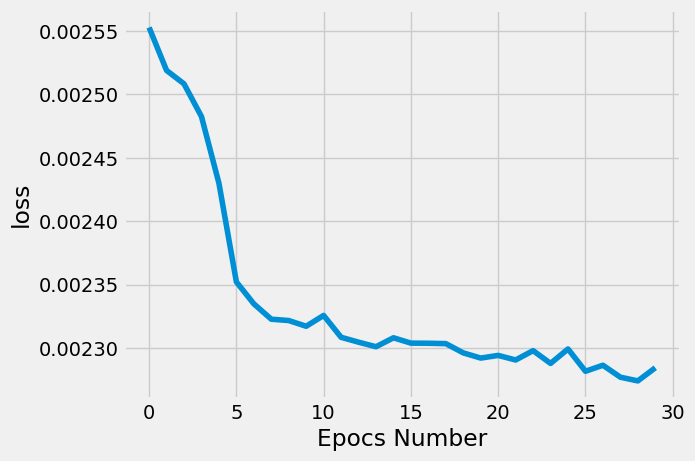

In [ ]:
plt.plot(range(len(Model_P.history.history['loss'])), Model_P.history.history['loss'])
plt.xlabel('Epocs Number')
plt.ylabel('loss')
plt.show()

In [ ]:
# For load model
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

New_Model = new_model = tf.keras.models.load_model('/content/LSTM_Univariate.keras')

In [ ]:
New_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 24, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 24, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 60)            29040     
                                                                 
 dropout_2 (Dropout)         (None, 24, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                2

In [ ]:
predictions_test = []

batch_one = training_scale[-ws:]
batch_new = batch_one.reshape((1, ws, 1))

for i in range(48):
  first_pred = Model_P.predict(batch_new)[0]

  predictions_test.append(first_pred)

  batch_new = np.append(batch_new[:,1:,:], [[first_pred]], axis=1)


predictions_test = np.array(predictions_test)
predictions = sc.inverse_transform(predictions_test)


1/1 [==============================] - 0s 39ms/step


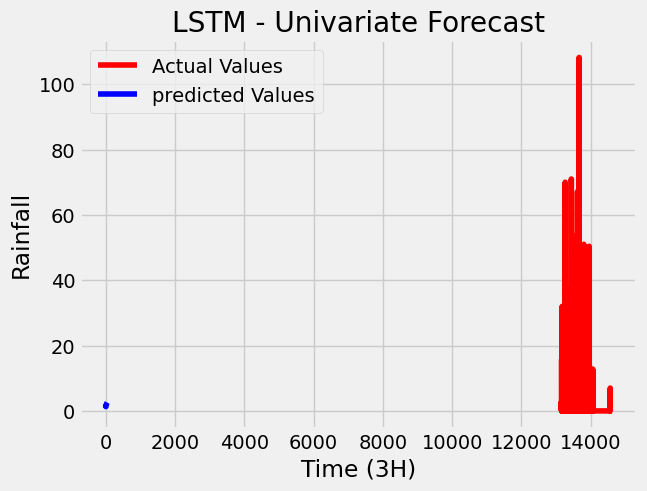

In [ ]:
plt.plot(test, color='red', label = 'Actual Values')
plt.plot(predictions, color='blue', label = 'predicted Values')
plt.title('LSTM - Univariate Forecast')
plt.xlabel('Time (3H)')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error

RMSE = math.sqrt(mean_squared_error(test, predictions))

ValueError: ignored